When encountering the term Autoencoder for the first time, one might wonder, Is it like an SVD with non-linear twists?. Autoencoders are neural networks designed to learn compact representations of data. Their architecture consists of an encoder (which compresses input data) and a decoder (which reconstructs the original data). The goal? To find a lower-dimensional representation (the “bottleneck”) that captures essential features. Singular Value Decomposition (SVD) is a mathematical technique that decomposes a matrix into three components: $U$ , $\Sigma$, and $V$. The matrix $\Sigma$ contains the singular values, which determine each component’s importance. 

SVD operates linearly—no fancy activation functions. Unlike the linear SVD, autoencoders embrace non-linearity. By using activation functions like ReLU or sigmoid, they capture complex relationships in the data.

 
$
\begin{array}{|l|l|}
\hline
\textbf{Application} & \textbf{SVD} & \textbf{Autoencoder} \\
\hline
\text{Data Compression} & \text{Compresses data by retaining significant singular values.} & \text{Reduces high-dimensional data into a manageable form.} \\
\hline
\text{Image Recognition} & \text{Used for face recognition and image compression.} & \text{Denoises corrupted data.} \\
\hline
\text{Collaborative Filtering} & \text{Uncovers latent factors in user-item interactions.} & \text{N/A} \\
\hline
\text{Dimensionality Reduction} & \text{N/A} & \text{Excels at dimensionality reduction.} \\
\hline
\text{Noise Reduction} & \text{N/A} & \text{Denoises data by learning robust representations.} \\
\hline
\text{Image Generation} & \text{N/A} & \text{VAEs create new data samples.} \\
\hline
\end{array}
$

In [2]:
##Credict Card froud detection using autoencoder

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import polars as pl

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [3]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [4]:
main_path = "credit_card/creditcard_2023.csv"

In [5]:
df = pd.read_csv(main_path)
#df = pl.read_csv(main_path)
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [50]:
# Normalize the "Amount" column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Extract features and labels
X = df.drop(["Class", "id"], axis=1).values
y = df["Class"].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pass the data to tensors

X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)  
y_test_tensor = torch.LongTensor(y_test)    


# Create DataLoader to handle data in batches
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


bs = 512
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=bs,
    shuffle=True,
    num_workers=8)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=bs,
    shuffle=False,
    num_workers=8)


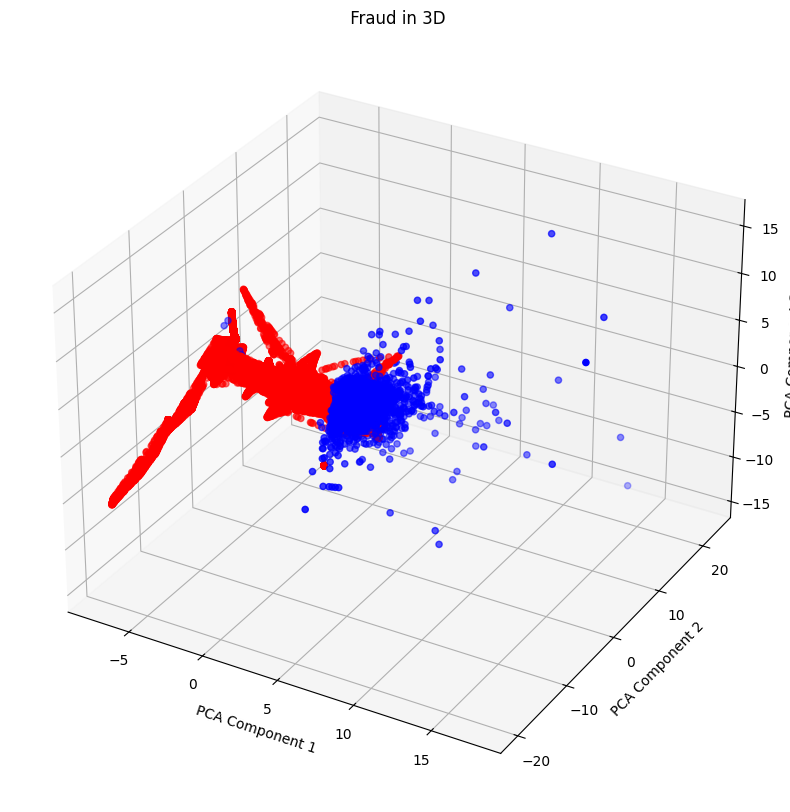

In [9]:
# 
pca = PCA(n_components=3)
X_test_reduced = pca.fit_transform(X_test)

# colores para los puntos, 'r' para anomalías y 'b' para normales
colors = ['r' if x == 1 else 'b' for x in y_test]

# 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 3D
scatter = ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], X_test_reduced[:, 2], 
                     c=colors, marker='o')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title(' Fraud in 3D')

# Mostrar la gráfica
plt.show()


In [71]:
# ## Build the Autoencoder 

# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(29, 64),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(64, 32),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(32, 16),
#             nn.ReLU(),
#             nn.Linear(16, 8),
#         )
#         self.decoder = nn.Sequential(
#             nn.Linear(8, 16),
#             nn.ReLU(),
#             nn.Linear(16, 32),
#             nn.ReLU(),
#             nn.Linear(32, 64),
#             nn.ReLU(),
#             nn.Linear(64, 29),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x


## Build the Autoencoder 

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(29, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 8)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 29),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [95]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        
        self.classifier = nn.Sequential(
            nn.Linear(8, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 8),
            nn.LeakyReLU(0.2),
            nn.Linear(8, 1)  # Output layer for binary classification
        )
    
    def forward(self, x):
        x = self.classifier(x)
        return x  # Raw logits (not passed through sigmoid yet)

In [96]:
autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop for autoencoder
num_epochs = 200
for epoch in range(num_epochs):
    autoencoder.train()
    train_loss = 0
    num_samples = 0

    for batch in train_loader:
        X_batch, _ = batch
        X_batch = X_batch.to(device)
        
        # Forward pass
        outputs = autoencoder(X_batch)
        loss = criterion(outputs, X_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * X_batch.size(0)
        num_samples += X_batch.size(0)

    avg_train_loss = train_loss / num_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')



Epoch [1/200], Loss: 0.8955
Epoch [2/200], Loss: 0.8061


KeyboardInterrupt: 

In [ ]:
#Extract Features

autoencoder.eval()
features = []
labels = []

with torch.no_grad():
    for batch in train_loader:
        X_batch, y_batch = batch
        X_batch = X_batch.to(device)
        feature = autoencoder.encoder(X_batch)
        features.append(feature.cpu())
        labels.append(y_batch.cpu())

features = torch.cat(features)
labels = torch.cat(labels)


In [91]:
T#rain the Classifier:


classifier = Classifier().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

# Training loop for classifier
num_epochs = 100
for epoch in range(num_epochs):
    classifier.train()
    train_loss = 0
    num_samples = 0

    for i in range(0, len(features), batch_size):
        feature_batch = features[i:i+batch_size].to(device)
        label_batch = labels[i:i+batch_size].to(device)
        
        # Forward pass
        logits = classifier(feature_batch)
        loss = criterion(logits.squeeze(), label_batch.float())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * feature_batch.size(0)
        num_samples += feature_batch.size(0)

    avg_train_loss = train_loss / num_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')



Epoch [1/200], Loss: 0.7019
Epoch [2/200], Loss: 0.6773
Epoch [3/200], Loss: 0.6757
Epoch [4/200], Loss: 0.6756
Epoch [5/200], Loss: 0.6746
Epoch [6/200], Loss: 0.6635
Epoch [7/200], Loss: 0.6401
Epoch [8/200], Loss: 0.6355
Epoch [9/200], Loss: 0.6311
Epoch [10/200], Loss: 0.6295
Epoch [11/200], Loss: 0.6289
Epoch [12/200], Loss: 0.6281
Epoch [13/200], Loss: 0.6264
Epoch [14/200], Loss: 0.6243
Epoch [15/200], Loss: 0.6235
Epoch [16/200], Loss: 0.6227
Epoch [17/200], Loss: 0.6217
Epoch [18/200], Loss: 0.6207
Epoch [19/200], Loss: 0.6200
Epoch [20/200], Loss: 0.6197
Epoch [21/200], Loss: 0.6194
Epoch [22/200], Loss: 0.6190
Epoch [23/200], Loss: 0.6174
Epoch [24/200], Loss: 0.6159
Epoch [25/200], Loss: 0.6154
Epoch [26/200], Loss: 0.6145
Epoch [27/200], Loss: 0.6138
Epoch [28/200], Loss: 0.6135
Epoch [29/200], Loss: 0.6133
Epoch [30/200], Loss: 0.6132
Epoch [31/200], Loss: 0.6130
Epoch [32/200], Loss: 0.6128
Epoch [33/200], Loss: 0.6126
Epoch [34/200], Loss: 0.6125
Epoch [35/200], Loss: 0

In [92]:

autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    autoencoder.train()  # Set model to training mode
    train_loss = 0
    num_samples = 0  # To count the number of samples processed

    for batch in train_loader:
        # Unpack batch
        X_batch, y_batch = batch
        X_batch, y_batch =X_batch.to(device), y_batch.to(device)
        # Forward pass
        outputs = autoencoder(X_batch)
        loss = criterion(outputs, X_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update training loss and sample count
        train_loss += loss.item() * X_batch.size(0)  # Multiply by batch size to get total loss for this batch
        num_samples += X_batch.size(0)  # Accumulate number of samples

    # Compute average training loss for this epoch
    avg_train_loss = train_loss / num_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')


Epoch [1/200], Loss: 0.8478


KeyboardInterrupt: 

In [82]:
contador = [values for values in y_test if values==1]
len(contador)

56976

In [93]:
#  reconstruction error on the training set
with torch.no_grad():
    X_train_tensor=X_train_tensor.to(device)
    reconstructions = autoencoder(X_train_tensor)

    train_loss = criterion(reconstructions, X_train_tensor)
print(f'Training set loss: {train_loss.item():.4f}')

# threshold as a multiple of the training set loss
threshold = train_loss.item() * 2.5
print(f'Set threshold: {threshold:.4f}')


Training set loss: 0.7994
Set threshold: 1.9986


In [94]:
# Detect anomalies on the test set
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    reconstructions = autoencoder(X_test_tensor)
    test_loss = torch.mean((reconstructions - X_test_tensor) ** 2, dim=1)

anomalies = test_loss > threshold
anomaly_indices = np.where(anomalies.cpu().numpy())[0]

print(f'Number of anomalies detected: {len(anomaly_indices)}')


Number of anomalies detected: 8715


In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a list of predictions (1 for anomaly, 0 for normal)
y_pred = np.zeros_like(y_test)
y_pred[anomaly_indices] = 1

# Evaluate the system
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.9052
Recall: 0.1441
F1 Score: 0.2486


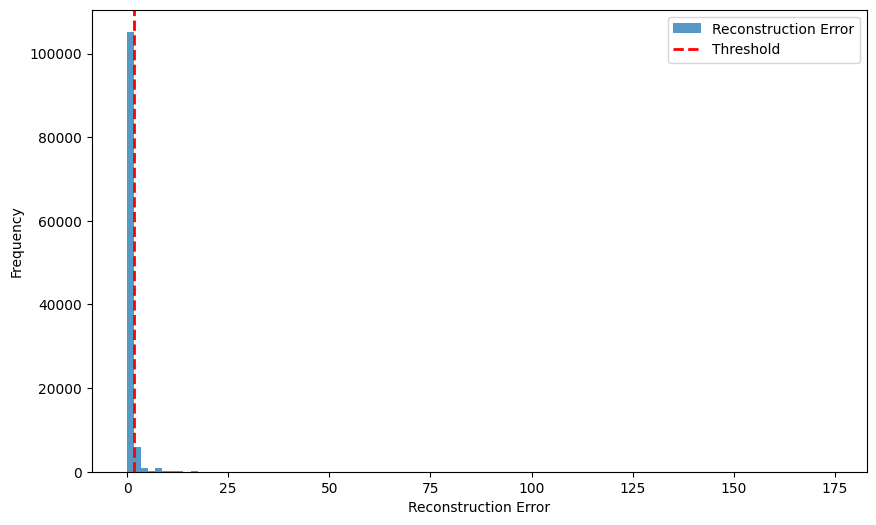

In [86]:
# Plot reconstruction error
plt.figure(figsize=(10, 6))
plt.hist(test_loss.cpu().numpy(), bins=100, alpha=0.75, label='Reconstruction Error')
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2, label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set the model to evaluation mode
autoencoder.eval()

# Compute reconstruction errors for the test set
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    reconstructions = autoencoder(X_test_tensor)
    
    # Calculate reconstruction loss for each sample
    reconstruction_errors = torch.mean((reconstructions - X_test_tensor) ** 2, dim=1).cpu().numpy()

# Convert true labels to numpy array
y_true = y_test_tensor.cpu().numpy()

Set threshold: 1.7159


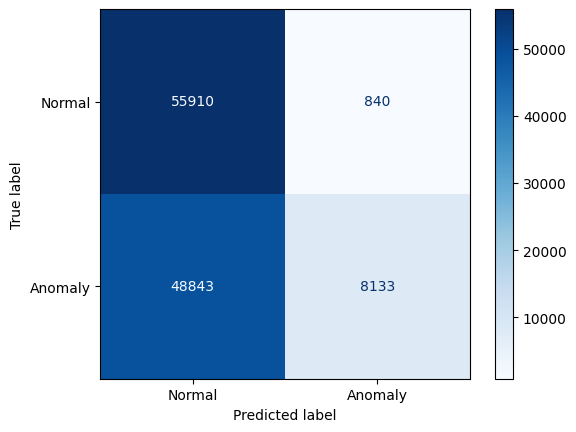

In [88]:
# Recycle code from above
threshold = train_loss.item() * 2.5
print(f'Set threshold: {threshold:.4f}')

# Create binary labels based on the threshold
y_pred = (reconstruction_errors > threshold).astype(int)

# Convert true labels to binary if necessary
# '1' represents anomaly
y_true_binary = (y_true == 1).astype(int)  

# Compute confusion matrix
cm = confusion_matrix(y_true_binary, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap='Blues', values_format='d')

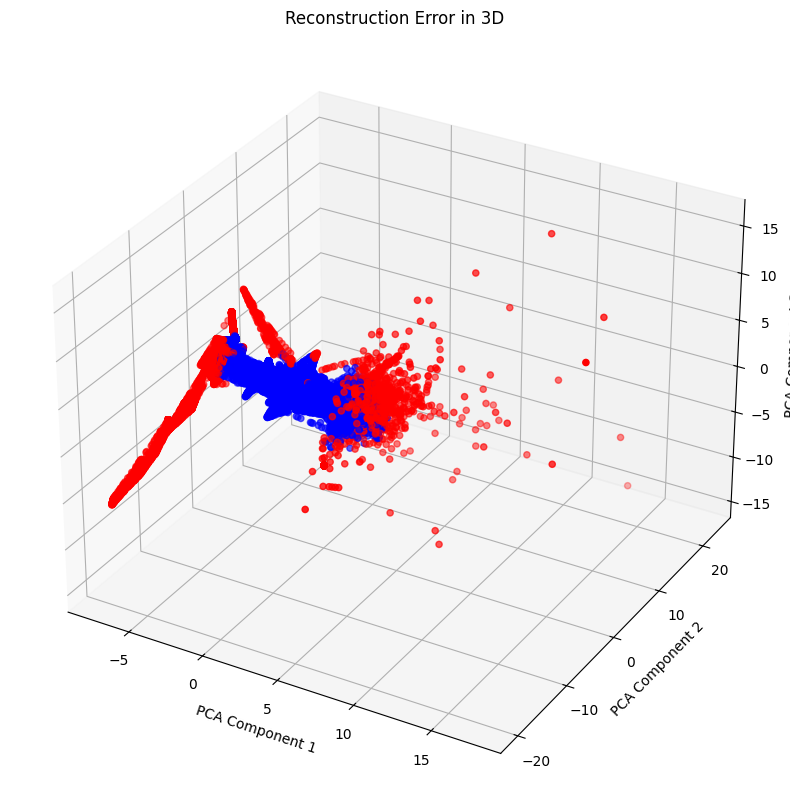

In [89]:
# 
pca = PCA(n_components=3)
X_test_reduced = pca.fit_transform(X_test)

# colores para los puntos, 'r' para anomalías y 'b' para normales
colors = ['r' if x else 'b' for x in anomalies.cpu().numpy()]

# 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 3D
scatter = ax.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], X_test_reduced[:, 2], 
                     c=colors, marker='o')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('Reconstruction Error in 3D')

# Mostrar la gráfica
plt.show()
